In [1]:
!ls -lah

total 57M
drwxr-sr-x 3 tools.paws tools.paws 4.0K Mar  8 19:54 .
drwxr-sr-x 7 tools.paws tools.paws 4.0K Mar  8 18:09 ..
drwxr-sr-x 2 tools.paws tools.paws 4.0K Mar  8 19:54 .ipynb_checkpoints
-rw-r--r-- 1 tools.paws tools.paws  27M Mar  8 18:18 enwiki-redirects-endash-20170308.tsv
-rw-r--r-- 1 tools.paws tools.paws 5.1K Mar  8 19:55 enwiki-redirects-endash-errors.pickle
-rw-r--r-- 1 tools.paws tools.paws 4.6K Mar  8 19:55 enwiki-redirects-endash-errors.tsv
-rw-r--r-- 1 tools.paws tools.paws 2.2M Mar  8 19:55 enwiki-redirects-endash-processed.pickle
-rw-r--r-- 1 tools.paws tools.paws 2.1M Mar  8 19:55 enwiki-redirects-endash-processed.tsv
-rw-r--r-- 1 tools.paws tools.paws  27M Mar  8 18:09 enwiki-redirects-to-endash-20170308.tsv
-rw-r--r-- 1 tools.paws tools.paws 1.7K Mar  8 19:29 get_data.py
-rw-r--r-- 1 tools.paws tools.paws  25K Mar  8 19:54 process-visualize.ipynb
-rw-r--r-- 1 tools.paws tools.paws 171K Mar  8 19:36 redirects.ipynb


In [2]:
!wc -l enwiki-redirects-endash-processed.tsv

11761 enwiki-redirects-endash-processed.tsv


In [3]:
!head enwiki-redirects-endash-errors.tsv

Namiba/124th_Maine_Senate
Articles_for_creation/12:00_a.m._-_1:00_a.m.
Rmallett/1877_Wimbledon_Championship_–_Singles
Rmallett/1877_Wimbledon_Championship_-_Singles
Rmallett/1878_Wimbledon_Championship_–_Singles
Rmallett/1878_Wimbledon_Championship_-_Singles
Rmallett/1879_Wimbledon_Championship_–_Singles
Rmallett/1879_Wimbledon_Championship_-_Singles
Rmallett/1880_Wimbledon_Championship_-_Singles
Rmallett/1881_Wimbledon_Championship_-_Singles


In [4]:
import pickle

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
pkl_file = open("enwiki-redirects-endash-processed.pickle", 'rb')
df = pickle.load(pkl_file)
len(df)


7413

In [7]:
df[0:5]

,revid,timestamp,user,comment,is_redirect,page_title,page_namespace,page_text
0,334052434.0,2009-12-26T04:55:57Z,DASHBot,"moved [[""FF.SS."" - Cioè: ""...che mi hai portat...",True,"""FF.SS."" - Cioè: ""...che mi hai portato a fare...",0.0,"#REDIRECT [[""FF.SS."" – Cioè: ""...che mi hai po..."
0,415186497.0,2011-02-21T19:55:28Z,DerBorg,"[[WP:AES|←]]Redirected page to [[""FF.SS."" – Ci...",True,FF.SS.,0.0,"#REDIRECT [[""FF.SS."" – Cioè: ""...che mi hai po..."
0,475846929.0,2012-02-08T23:25:55Z,RjwilmsiBot,Create redirect for title with diacritics usin...,True,"""FF.SS."" – Cioe: ""...che mi hai portato a fare...",0.0,"#REDIRECT [[""FF.SS."" – Cioè: ""...che mi hai po..."
0,586979837.0,2013-12-20T17:31:33Z,Cavarrone,"[[WP:AES|←]]Redirected page to [[""FF.SS."" – Ci...",True,"F.F.S.S., cioè.. che mi hai portato a fare sop...",0.0,"#REDIRECT [[""FF.SS."" – Cioè: ""...che mi hai po..."
0,708965298.0,2016-03-08T12:52:52Z,AnomieBOT,"Redirecting to [[:""FF.SS."" – Cioe: ""...che mi ...",True,"""FF.SS."" - Cioe: ""...che mi hai portato a fare...",0.0,"#REDIRECT [[:""FF.SS."" – Cioè: ""...che mi hai p..."


In [8]:
df['datetime'] = pd.to_datetime(df.timestamp)
df = df.set_index('datetime')

In [9]:
gp = df.groupby([pd.TimeGrouper('1D', closed='left')])

/srv/paws/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


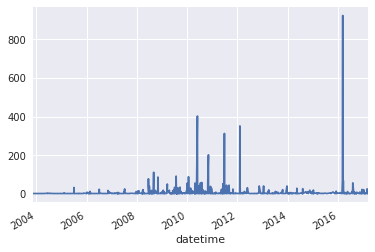

In [10]:
gp.revid.count().plot()

In [11]:
pkl_file = open("enwiki-redirects-endash-processed.pickle", 'rb')
df = pickle.load(pkl_file)
len(df)

7413